In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re

%matplotlib inline

sns.set(style="ticks")

import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')


In [205]:
df= pd.read_csv('Electricity Consumption.csv')

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   DATE                          561 non-null    object 
 1   Electricty_Consumption_in_TW  561 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.9+ KB


In [207]:
df.head()

,DATE,Electricty_Consumption_in_TW
0,1/1/1973,35.9728
1,2/1/1973,36.1334
2,3/1/1973,35.0625
3,4/1/1973,33.8416
4,5/1/1973,33.5107


In [208]:
df['DATE'] = pd.to_datetime(df['DATE'], format='%m/%d/%Y')


In [209]:
df.set_index(df.DATE, inplace=True)

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 561 entries, 1973-01-01 to 2019-09-01
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   DATE                          561 non-null    datetime64[ns]
 1   Electricty_Consumption_in_TW  561 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 13.1 KB


In [211]:
df.tail()

,DATE,Electricty_Consumption_in_TW
DATE,,
2019-05-01,2019-05-01,97.5860
2019-06-01,2019-06-01,110.8580
2019-07-01,2019-07-01,122.1014
2019-08-01,2019-08-01,121.7765
2019-09-01,2019-09-01,109.7190


In [212]:
df.DATE[0] # Timestamp data

Timestamp('1973-01-01 00:00:00')

In [213]:
df['year'] = df.DATE.dt.year
df['month'] = df.DATE.dt.month

In [214]:
#Check trend in consumptionElectricty_Consumption_in_TW

In [215]:
ts = df.Electricty_Consumption_in_TW

<Axes: xlabel='DATE'>

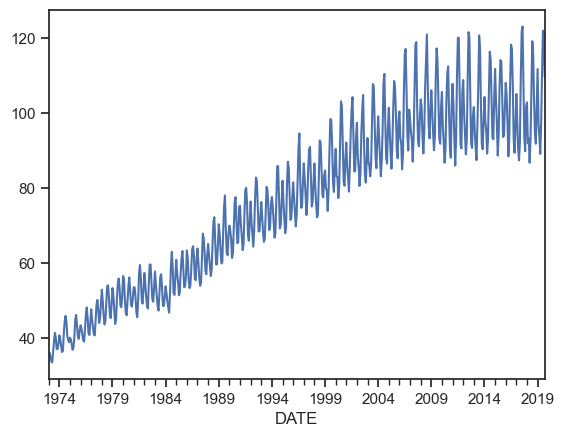

In [216]:
ts.plot()

In [217]:
pd.pivot_table?

Signature:
pd.pivot_table(
    data: 'DataFrame',
    values=None,
    index=None,
    columns=None,
    aggfunc: 'AggFuncType' = 'mean',
    fill_value=None,
    margins: 'bool' = False,
    dropna: 'bool' = True,
    margins_name: 'Hashable' = 'All',
    observed: 'bool' = False,
    sort: 'bool' = True,
) -> 'DataFrame'
Docstring:
Create a spreadsheet-style pivot table as a DataFrame.

The levels in the pivot table will be stored in MultiIndex objects
(hierarchical indexes) on the index and columns of the result DataFrame.

Parameters
----------
data : DataFrame
values : list-like or scalar, optional
    Column or columns to aggregate.
index : column, Grouper, array, or list of the previous
    Keys to group by on the pivot table index. If a list is passed,
    it can contain any of the other types (except list). If an array is
    passed, it must be the same length as the data and will be used in
    the same manner as column values.
columns : column, Grouper, array, or list of the

In [218]:
pd.pivot_table(data = df, index = 'year', columns = 'month', values = 'Electricty_Consumption_in_TW')

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
1973,35.9728,36.1334,35.0625,33.8416,33.5107,36.4823,39.1412,41.4137,40.1639,37.1133,37.0248,38.4341
1974,40.7455,39.8340,37.9408,36.3004,36.5293,40.8899,44.3563,45.9240,44.4555,40.6417,39.4901,38.9068
1975,40.0956,39.6944,38.3040,36.8939,37.5668,40.3832,44.9671,46.1853,43.3001,40.3836,39.8092,42.0597
1976,43.4099,42.5826,40.9244,39.3533,39.0766,42.4851,46.3693,48.1945,45.1688,41.1880,40.8431,44.1468
1977,47.6892,44.8505,42.8557,41.0177,40.7201,45.0610,48.9685,50.1898,47.5982,44.0684,45.4267,49.3447
1978,52.9153,49.9488,46.1749,43.6652,44.5402,48.9480,53.8292,54.1182,50.9980,46.3711,45.3267,49.0027
1979,53.3617,51.6279,47.8264,43.7935,44.8591,50.3292,54.3579,55.9197,53.5776,48.7261,48.2585,51.3008
1980,56.5838,55.6802,50.4428,46.8693,46.0886,49.7595,53.8273,56.2272,52.5737,48.8947,48.4081,50.6659
1981,53.5867,53.5461,51.0708,46.9172,45.5795,50.0235,57.1384,59.5376,56.1935,50.3249,49.2234,52.8176


<Axes: xlabel='year'>

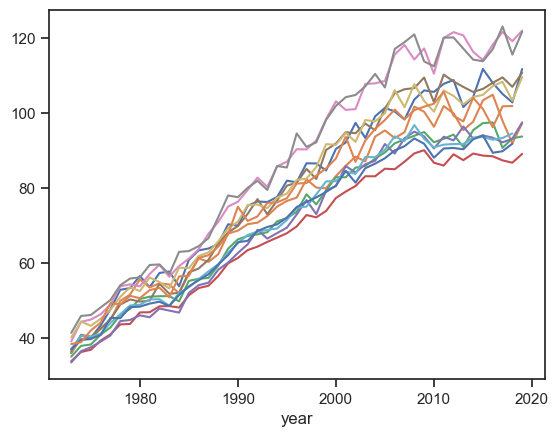

In [219]:
#Long to wide data - Trend
pd.pivot_table(data = df, index = 'year', columns = 'month', values = 'Electricty_Consumption_in_TW').plot(legend=False)

<Axes: xlabel='month'>

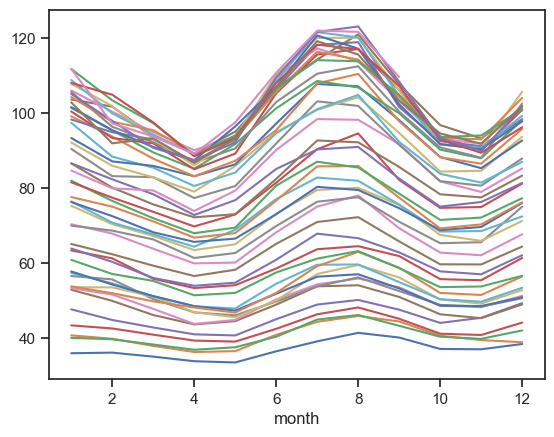

In [220]:
# Seasonaility
pd.pivot_table(data = df, index = 'month', columns = 'year', values = 'Electricty_Consumption_in_TW').plot(legend=False)

In [221]:
df.set_index('DATE', inplace=True)


In [222]:
df = df.asfreq('MS')


In [223]:
df.head()

,Electricty_Consumption_in_TW,year,month
DATE,,,
1973-01-01,35.9728,1973,1
1973-02-01,36.1334,1973,2
1973-03-01,35.0625,1973,3
1973-04-01,33.8416,1973,4
1973-05-01,33.5107,1973,5


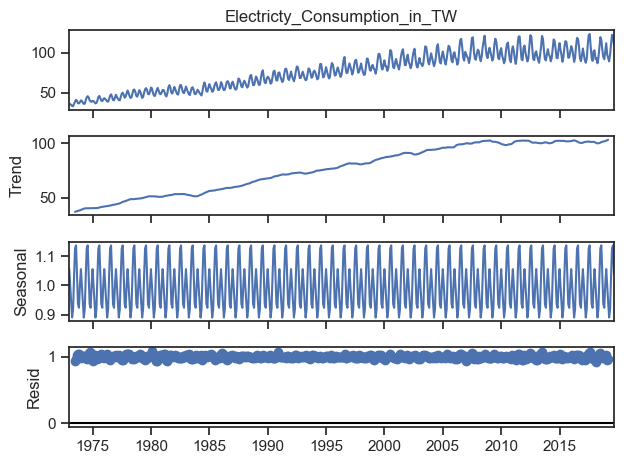

In [224]:
#Decompose time series

from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Decompose the time series with the frequency set

#multiplicative
decomposition = seasonal_decompose(df['Electricty_Consumption_in_TW'], model='multiplicative')
decomposition.plot()
plt.show()


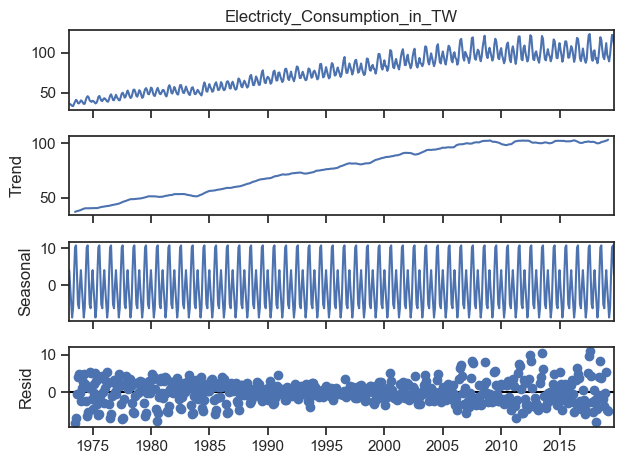

In [225]:
#additive

decomposition = seasonal_decompose(df['Electricty_Consumption_in_TW'], model='additive')
decomposition.plot()
plt.show()

In [226]:
pd.concat([decomposition.observed, decomposition.trend, decomposition.seasonal, decomposition.resid], axis=1).head(12)

,Electricty_Consumption_in_TW,trend,seasonal,resid
DATE,,,,
1973-01-01,35.9728,NaN,4.135755,NaN
1973-02-01,36.1334,NaN,-0.705922,NaN
1973-03-01,35.0625,NaN,-4.489678,NaN
1973-04-01,33.8416,NaN,-8.668415,NaN
1973-05-01,33.5107,NaN,-6.044817,NaN
1973-06-01,36.4823,NaN,2.943116,NaN
1973-07-01,39.1412,37.223388,10.277826,-8.360014
1973-08-01,41.4137,37.576442,10.828421,-6.991163
1973-09-01,40.1639,37.850562,2.891998,-0.578660


## Autocorrelations and Partial autocorrelation

In [227]:
from statsmodels.tsa.stattools import acf, pacf_ols 

In [228]:
acf(ts)

array([1.        , 0.95647392, 0.87822982, 0.82945315, 0.841529  ,
       0.88813059, 0.91122643, 0.88196658, 0.82805401, 0.80579718,
       0.84356484, 0.9092393 , 0.94048579, 0.90057994, 0.82617458,
       0.77958655, 0.79320802, 0.8397309 , 0.86221357, 0.83379379,
       0.78177625, 0.76069374, 0.79757444, 0.8619873 , 0.89139636,
       0.85166914, 0.77857553, 0.73313065])

In [229]:
pacf_ols(ts)

array([ 1.        ,  0.96010214, -0.46239143,  0.68714216,  0.45886201,
        0.1559856 , -0.18798794, -0.01014574,  0.18169407,  0.49156644,
        0.49933306,  0.5094987 ,  0.37656677, -0.41925301, -0.05163282,
       -0.13345659,  0.11005347, -0.00342721, -0.02550308,  0.01845861,
       -0.0503431 , -0.00971101,  0.057987  ,  0.2401917 ,  0.1500228 ,
       -0.12035626, -0.01871735, -0.05644169])

In [230]:
import statsmodels.tsa.api as smt

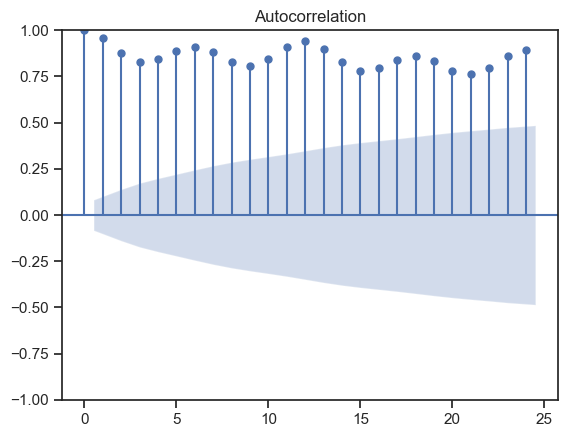

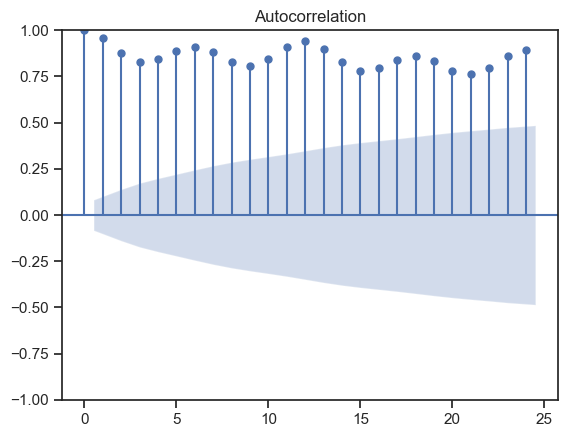

In [231]:
smt.graphics.plot_acf(ts, lags=24)

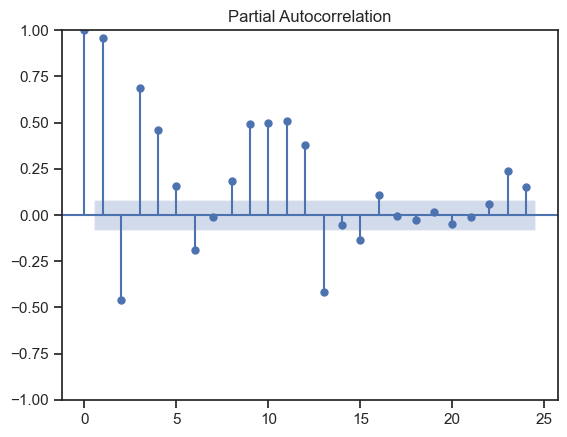

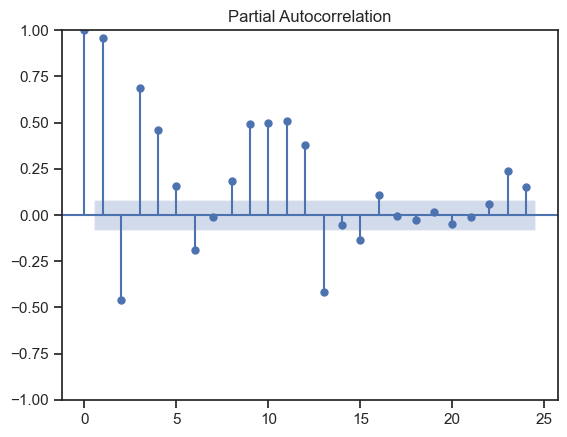

In [232]:
smt.graphics.plot_pacf(ts, lags = 24, method='ols')

In [233]:
# check if series stationary?

# Dickey-Fuller test:

from statsmodels.tsa.stattools import adfuller
adfuller(ts)   #p-value:0.4103   , since p-value is high, the series(ts) is not stationary

(-1.7405933729832515,
 0.4103281604468643,
 15,
 545,
 {'1%': -3.442405720052601,
  '5%': -2.866857804790472,
  '10%': -2.5696022094099824},
 2295.409663118043)

In [234]:
ts_ln = np.log(ts)

In [235]:
adfuller(ts_ln)

#p-value = 0.0347204433006547, since p-value<0.05, the series(ln_ts) is stationary

(-3.0018666788915795,
 0.0347204433006547,
 15,
 545,
 {'1%': -3.442405720052601,
  '5%': -2.866857804790472,
  '10%': -2.5696022094099824},
 -2515.6635118596973)

<Axes: xlabel='DATE'>

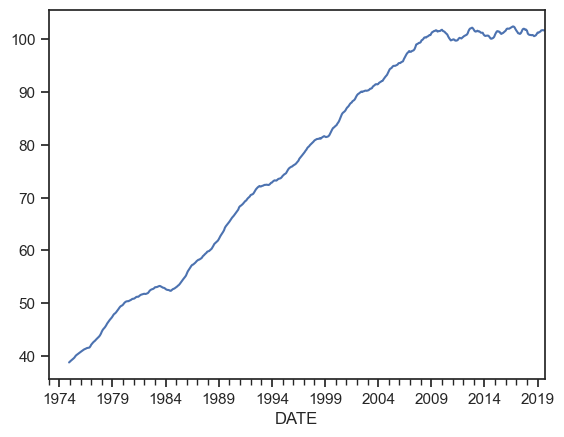

In [236]:
# Moving average - trend

ts.rolling(window=24).mean().plot()

<Axes: xlabel='DATE'>

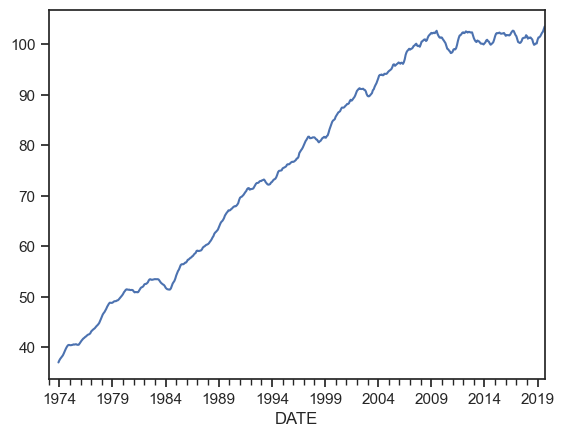

In [237]:
ts.rolling(window=12).mean().plot()

<Axes: xlabel='DATE'>

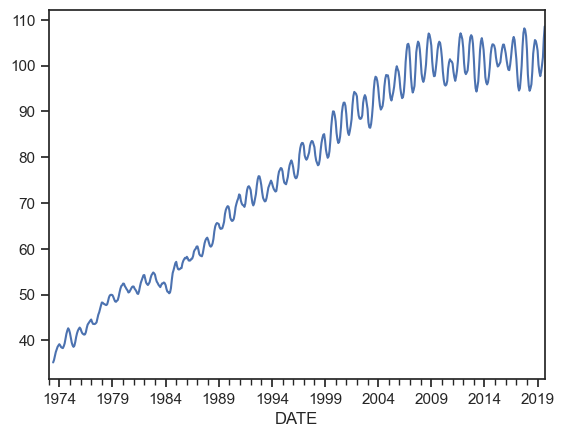

In [238]:
ts.rolling(window=6).mean().plot()

<Axes: xlabel='DATE'>

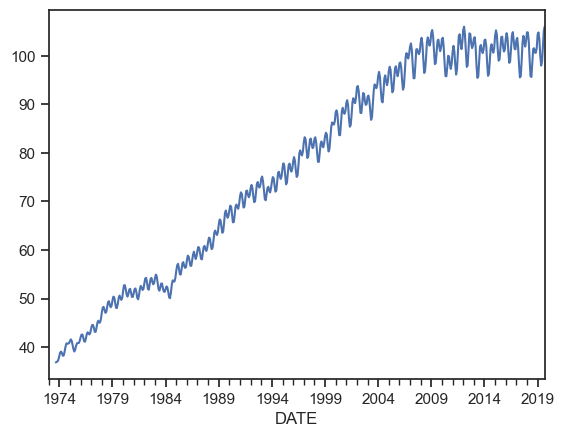

In [239]:
ts.rolling(window=9).mean().plot()

## ETS Model

In [240]:

from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [241]:
from sklearn.metrics import mean_absolute_error

def auto_hwm(timeseries, val_split_date, alpha=[None], beta=[None], gamma=[None], 
              trend=None, seasonal=None, periods=None, verbose=False):

    best_params = []
    actual = timeseries[val_split_date:]

    print('Evaluating Exponential Smoothing model for', len(alpha) * len(beta) * len(gamma), 'fits\n')

    for a in alpha:
        for b in beta:
            for g in gamma:

                    if(verbose == True):
                        print('Checking for', {'alpha': a, 'beta': b, 'gamma': g})

                    model = ExponentialSmoothing(timeseries, trend=trend, seasonal=seasonal, seasonal_periods=periods)
                    model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
                    f_cast = model.predict(model.params, start=actual.index[0])
                    score = np.where(np.float64(mean_absolute_error(actual, f_cast)/actual).mean()>0,np.float64(mean_absolute_error(actual, f_cast)/actual).mean(),0)

                    best_params.append({'alpha': a, 'beta': b, 'gamma': g, 'mae': score})

    return min(best_params, key=lambda x: x['mae'])

In [242]:
alpha = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
beta = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
gamma =[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

In [243]:
print(f"Index type: {type(df.index)}")
print(f"Index frequency: {df.index.freq}")

Index type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
Index frequency: <MonthBegin>


In [244]:
def auto_hwm(ts, val_split_date, alpha=None, beta=None, gamma=None, trend='add', seasonal='add', periods=12, verbose=True):
    # Ensure val_split_date is a Timestamp
    val_split_date = pd.Timestamp(val_split_date)

In [245]:
auto_hwm(ts, val_split_date= val_split_date1, alpha=None, beta=None, gamma=None, trend='add', seasonal='add', periods=12, verbose=True)

In [246]:
ets_model = ExponentialSmoothing(ts, trend='mul', seasonal='mul', seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.6, smoothing_seasonal=0.2)

In [247]:
print(ets_model.summary())

                           ExponentialSmoothing Model Results                           
Dep. Variable:     Electricty_Consumption_in_TW   No. Observations:                  561
Model:                     ExponentialSmoothing   SSE                           3675.183
Optimized:                                 True   AIC                           1086.477
Trend:                           Multiplicative   BIC                           1155.752
Seasonal:                        Multiplicative   AICC                          1087.739
Seasonal Periods:                            12   Date:                 Thu, 22 Aug 2024
Box-Cox:                                  False   Time:                         12:04:52
Box-Cox Coeff.:                            None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.100

In [248]:
#ETS model forecasting


forecast_periods = 24
forecast = ets_model.forecast(forecast_periods)

print(forecast)

2019-10-01     98.502551
2019-11-01     96.689990
2019-12-01    107.466533
2020-01-01    114.475623
2020-02-01    105.479011
2020-03-01    101.625597
2020-04-01     95.957349
2020-05-01    103.182474
2020-06-01    119.054074
2020-07-01    131.718523
2020-08-01    131.249905
2020-09-01    118.302846
2020-10-01    105.589372
2020-11-01    103.646404
2020-12-01    115.198272
2021-01-01    122.711635
2021-02-01    113.067756
2021-03-01    108.937106
2021-04-01    102.861054
2021-05-01    110.605994
2021-06-01    127.619485
2021-07-01    141.195084
2021-08-01    140.692751
2021-09-01    126.814209
Freq: MS, dtype: float64


## Predicting on test and calculate error metrics
-RMSE
-RMSPE
-MAPE

In [249]:
 # Model on the train data


train = ts['1973-01-01':'2019-04-01'] 

In [250]:
test = ts['2019-04-01':]

In [251]:
ets_model = ExponentialSmoothing(train, trend='mul', seasonal='mul', seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.6, smoothing_seasonal=0.2)

In [252]:
f_cast = ets_model.forecast(6)

In [253]:
f_cast

2019-05-01     95.459376
2019-06-01    110.707712
2019-07-01    122.685879
2019-08-01    122.248368
2019-09-01    110.035864
2019-10-01     98.233178
Freq: MS, dtype: float64

In [254]:
test

DATE
2019-04-01     89.1873
2019-05-01     97.5860
2019-06-01    110.8580
2019-07-01    122.1014
2019-08-01    121.7765
2019-09-01    109.7190
Name: Electricty_Consumption_in_TW, dtype: float64

In [255]:
# Calculate RMSE- Root Mean Square Error

from sklearn.metrics import mean_squared_error


rmse = np.sqrt(mean_squared_error(test, f_cast))

print(f"RMSE: {rmse}")


RMSE: 10.175175958338825


In [256]:
#Calculate RMSPE- Root Mean Sqaure Percentage Error

def rmspe(y_true, y_pred):
    return np.sqrt(np.mean(np.square((y_true - y_pred) / y_true))) * 100

rmspe(test,f_cast)


1.0227522478153082

In [257]:
#Calculate MAPE- Mean Absolute Percentage Error

print('test error', np.mean(np.abs(test - f_cast)/test))

test error 0.006939530288041687


In [258]:
ets_model = ExponentialSmoothing(ts, trend='mul', seasonal='mul', seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.6, smoothing_seasonal=0.2)

In [259]:
#lets check for more values

In [260]:
pred = ets_model.fittedvalues['2018-07-01':]

In [261]:
actual = train['2018-07-01':]

In [262]:
print('train error',np.mean(np.abs(actual-pred)/actual))

train error 0.0232763114345801


In [263]:
ets_model.forecast(12)

2019-10-01     98.502551
2019-11-01     96.689990
2019-12-01    107.466533
2020-01-01    114.475623
2020-02-01    105.479011
2020-03-01    101.625597
2020-04-01     95.957349
2020-05-01    103.182474
2020-06-01    119.054074
2020-07-01    131.718523
2020-08-01    131.249905
2020-09-01    118.302846
Freq: MS, dtype: float64

## SARIMA Model

In [264]:
# Take stationary series

ts_ln = np.log(ts)

# original = ts
# stationary series = ln_ts
# input for ARIMA: Yt = ts, d=0

In [265]:
adfuller(ts_ln)

#p-value<0.05-- Stationary series


(-3.0018666788915795,
 0.0347204433006547,
 15,
 545,
 {'1%': -3.442405720052601,
  '5%': -2.866857804790472,
  '10%': -2.5696022094099824},
 -2515.6635118596973)

In [266]:
# Series is seasonal - SARIMA Model
# value of q = 1, Q=1
# q value foudnd based after which value of lag, the correlations becoming zero or crossing zero (positive to negative or negative to positive)

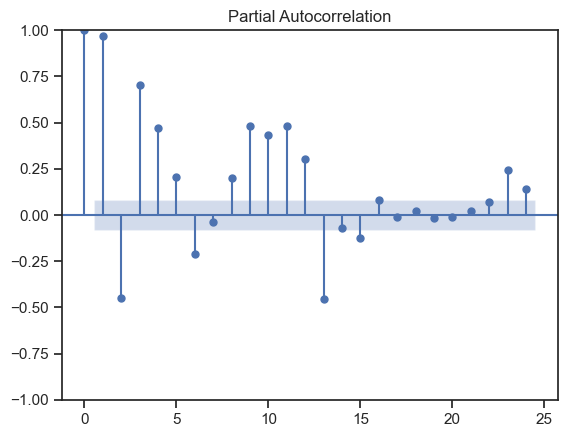

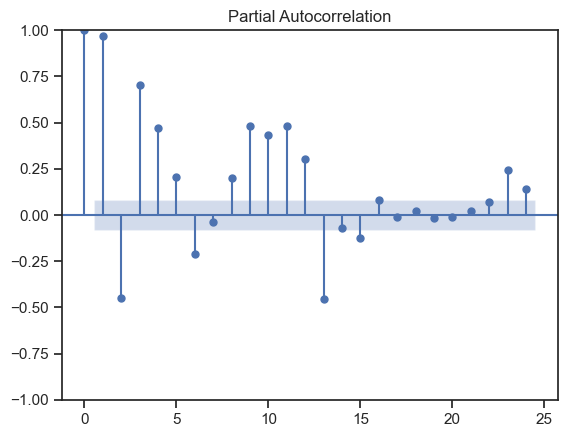

In [267]:
#PACF
smt.graphics.plot_pacf(ts_ln, lags = 24, method='ols')

In [268]:
#Based on PACF - you can find the value of p =1, P=1

In [269]:

#Box-Jenkins process - helps to get approximate values of p,d,q 

#using above p,d,q values, we will come up with ranges to check which value is best value

#Model = SARIMA
#Model input time series = ln_ts
#(p,d,q) = (1,0,1)
#(P,D,Q,T) = (1,0,1,12)

In [289]:
train = ts_ln[:'2019-04-01']
test = ts_ln['2019-05-01':]

In [271]:
import statsmodels.api as sm

model = sm.tsa.statespace.SARIMAX(train, order = (1,0,1), seasonal_order= (1,0,1,12),
                                             enforce_stationarity=False,
                                             enforce_invertibility=False).fit()

In [272]:
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:       Electricty_Consumption_in_TW   No. Observations:                  556
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                1308.251
Date:                            Thu, 22 Aug 2024   AIC                          -2606.502
Time:                                    12:05:33   BIC                          -2585.026
Sample:                                01-01-1973   HQIC                         -2598.104
                                     - 04-01-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9491      0.014     66.087      0.000       0.921       0.977
ma.L1         -0.1588      0.045   

In [273]:
#  AIC of -2606.502 suggests a strong fit with relatively low complexity.
# BIC is slightly higher than AIC, reflecting that the model complexity is being penalized more heavily.

In [274]:
f_cast = np.exp(model.forecast(6))

In [275]:
act = np.exp(test)

In [276]:
print('test_error:',np.mean(np.abs(act-f_cast)/act))

test_error: 0.008364782659536163


In [277]:
pred = np.exp(model.fittedvalues)['2018-10-01':]
act = np.exp(ts_ln)['2019-10-01':]

In [278]:
print('train_error_last1year:', np.mean(np.abs(act-pred)/act))

train_error_last1year: nan


In [279]:
import sys
import itertools
import warnings

def auto_arima(timeseries, regressors=None, p=range(0, 2), d=range(0, 2), q=range(0, 2),
              P=range(0, 2), D=range(0, 1), Q=range(0, 2)):

    # Generate all different combinations of p, d and q triplets
    pdq = list(itertools.product(p, d, q))

    # Generate all different combinations of seasonal p, q and q triplets
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]
    
    warnings.filterwarnings("ignore") # specify to ignore warning messages

    best_aic = np.inf
    best_pdq = None
    best_seasonal_pdq = None
    best_results = None
    
    for param in pdq:
        for param_seasonal in seasonal_pdq:

            try:
                temp_model = sm.tsa.statespace.SARIMAX(endog=timeseries,
                                                 exog=regressors,
                                                 order = param,
                                                 seasonal_order = param_seasonal,
                                                 enforce_stationarity=False,
                                                 enforce_invertibility=False)
                temp_results = temp_model.fit()

                print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, temp_results.aic))
                
                if temp_results.aic < best_aic:
                    best_aic = temp_results.aic
                    best_pdq = param
                    best_seasonal_pdq = param_seasonal
                    best_results = temp_results
                
            except:
                #print("Unexpected error:", sys.exc_info()[0])
                continue
    print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))
    print(best_results.summary().tables[0])
    print(best_results.summary().tables[1])
    #return best_results

In [280]:
best_results = auto_arima(ts_ln,  p=range(0, 3), d=range(2, 3), q=range(0, 3),
                         P=range(0, 3), D=range(0, 2), Q=range(0, 3))    #Number of models = 3*1*3*3*2*3 = 162

SARIMAX(0, 2, 0)x(0, 0, 0, 12)12 - AIC:-1238.5110123342886
SARIMAX(0, 2, 0)x(0, 0, 1, 12)12 - AIC:-1556.8995683959006
SARIMAX(0, 2, 0)x(0, 0, 2, 12)12 - AIC:-1641.3644931353451
SARIMAX(0, 2, 0)x(0, 1, 0, 12)12 - AIC:-1934.7097256562183
SARIMAX(0, 2, 0)x(0, 1, 1, 12)12 - AIC:-2121.063844453516
SARIMAX(0, 2, 0)x(0, 1, 2, 12)12 - AIC:-2075.2625828386
SARIMAX(0, 2, 0)x(1, 0, 0, 12)12 - AIC:-1967.9124463206467
SARIMAX(0, 2, 0)x(1, 0, 1, 12)12 - AIC:-2174.470988936154
SARIMAX(0, 2, 0)x(1, 0, 2, 12)12 - AIC:-2121.630527196973
SARIMAX(0, 2, 0)x(1, 1, 0, 12)12 - AIC:-1982.0537813054862
SARIMAX(0, 2, 0)x(1, 1, 1, 12)12 - AIC:-2116.1111909596525
SARIMAX(0, 2, 0)x(1, 1, 2, 12)12 - AIC:-2075.0049121520724
SARIMAX(0, 2, 0)x(2, 0, 0, 12)12 - AIC:-1989.673071333183
SARIMAX(0, 2, 0)x(2, 0, 1, 12)12 - AIC:-2123.2594493480738
SARIMAX(0, 2, 0)x(2, 0, 2, 12)12 - AIC:-2122.9192259727547
SARIMAX(0, 2, 0)x(2, 1, 0, 12)12 - AIC:-2006.787293049054
SARIMAX(0, 2, 0)x(2, 1, 1, 12)12 - AIC:-2082.161200445794
SARIMA

In [282]:
import statsmodels.api as sm

model = sm.tsa.statespace.SARIMAX(train, order = (2,2,1), seasonal_order= (1,0,1,12),
                                             enforce_stationarity=False,
                                             enforce_invertibility=False).fit()

print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:       Electricty_Consumption_in_TW   No. Observations:                  556
Model:             SARIMAX(2, 2, 1)x(1, 0, 1, 12)   Log Likelihood                1303.173
Date:                            Thu, 22 Aug 2024   AIC                          -2594.346
Time:                                    12:18:36   BIC                          -2568.597
Sample:                                01-01-1973   HQIC                         -2584.275
                                     - 04-01-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1372      0.043     -3.197      0.001      -0.221      -0.053
ar.L2         -0.2212      0.043   

In [290]:
f_cast = np.exp(model.forecast(5))
f_cast

2019-05-01     94.405630
2019-06-01    108.774480
2019-07-01    120.338273
2019-08-01    119.376666
2019-09-01    106.367515
Freq: MS, Name: predicted_mean, dtype: float64

In [291]:
act = np.exp(test)
act

DATE
2019-05-01     97.5860
2019-06-01    110.8580
2019-07-01    122.1014
2019-08-01    121.7765
2019-09-01    109.7190
Name: Electricty_Consumption_in_TW, dtype: float64

In [293]:
# Calculate RMSE- Root Mean Square Error

from sklearn.metrics import mean_squared_error


rmse = np.sqrt(mean_squared_error(act, f_cast))

print(f"RMSE: {rmse}")

#Calculate RMSPE- Root Mean Sqaure Percentage Error

def rmspe(y_true, y_pred):
    return np.sqrt(np.mean(np.square((y_true - y_pred) / y_true))) * 100

rmspe= rmspe(act,f_cast)
print(f"RMSPE: {rmse}")


#Calculate MAPE- Mean Absolute Percentage Error

print('test error', np.mean(np.abs(act - f_cast)/act))


RMSE: 2.628919232576812
RMSPE: 2.628919232576812
test error 0.023215547076353656


In [295]:
pred = np.exp(model.fittedvalues)['2019-04-01':]
act = np.exp(ts_ln)['2019-04-01':]

In [296]:
print('train_error_last1year:', np.mean(np.abs(act-pred)/act))

train_error_last1year: 0.006435413717117648


In [297]:
import statsmodels.api as sm

model = sm.tsa.statespace.SARIMAX(ts_ln, order = (1,2,1), seasonal_order= (1,0,1,12),
                                             enforce_stationarity=False,
                                             enforce_invertibility=False).fit()

In [298]:
f_cast = np.exp(model.forecast(12))

In [299]:
ts

DATE
1973-01-01     35.9728
1973-02-01     36.1334
1973-03-01     35.0625
1973-04-01     33.8416
1973-05-01     33.5107
                ...   
2019-05-01     97.5860
2019-06-01    110.8580
2019-07-01    122.1014
2019-08-01    121.7765
2019-09-01    109.7190
Name: Electricty_Consumption_in_TW, Length: 561, dtype: float64

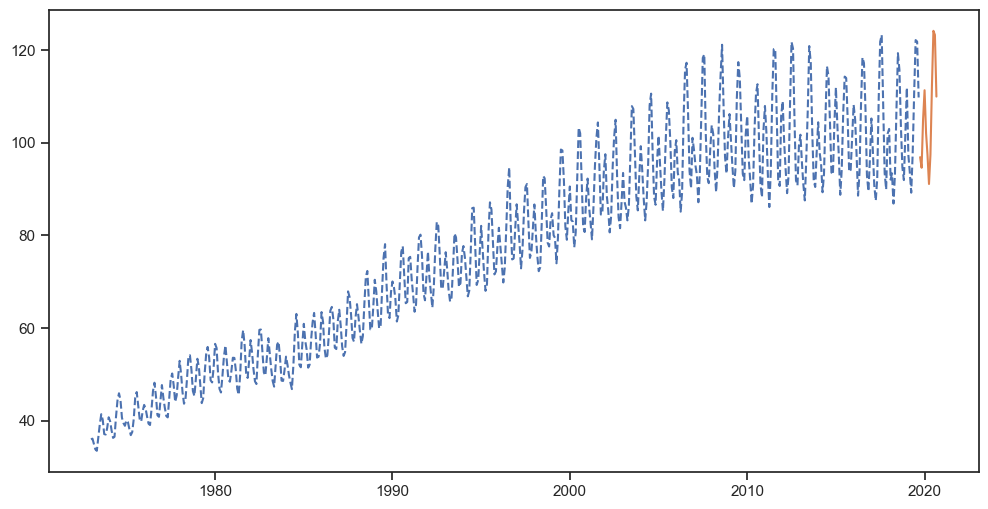

In [300]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(ts, '--', label='obs')
plt.plot(f_cast, '-', label=f_cast)

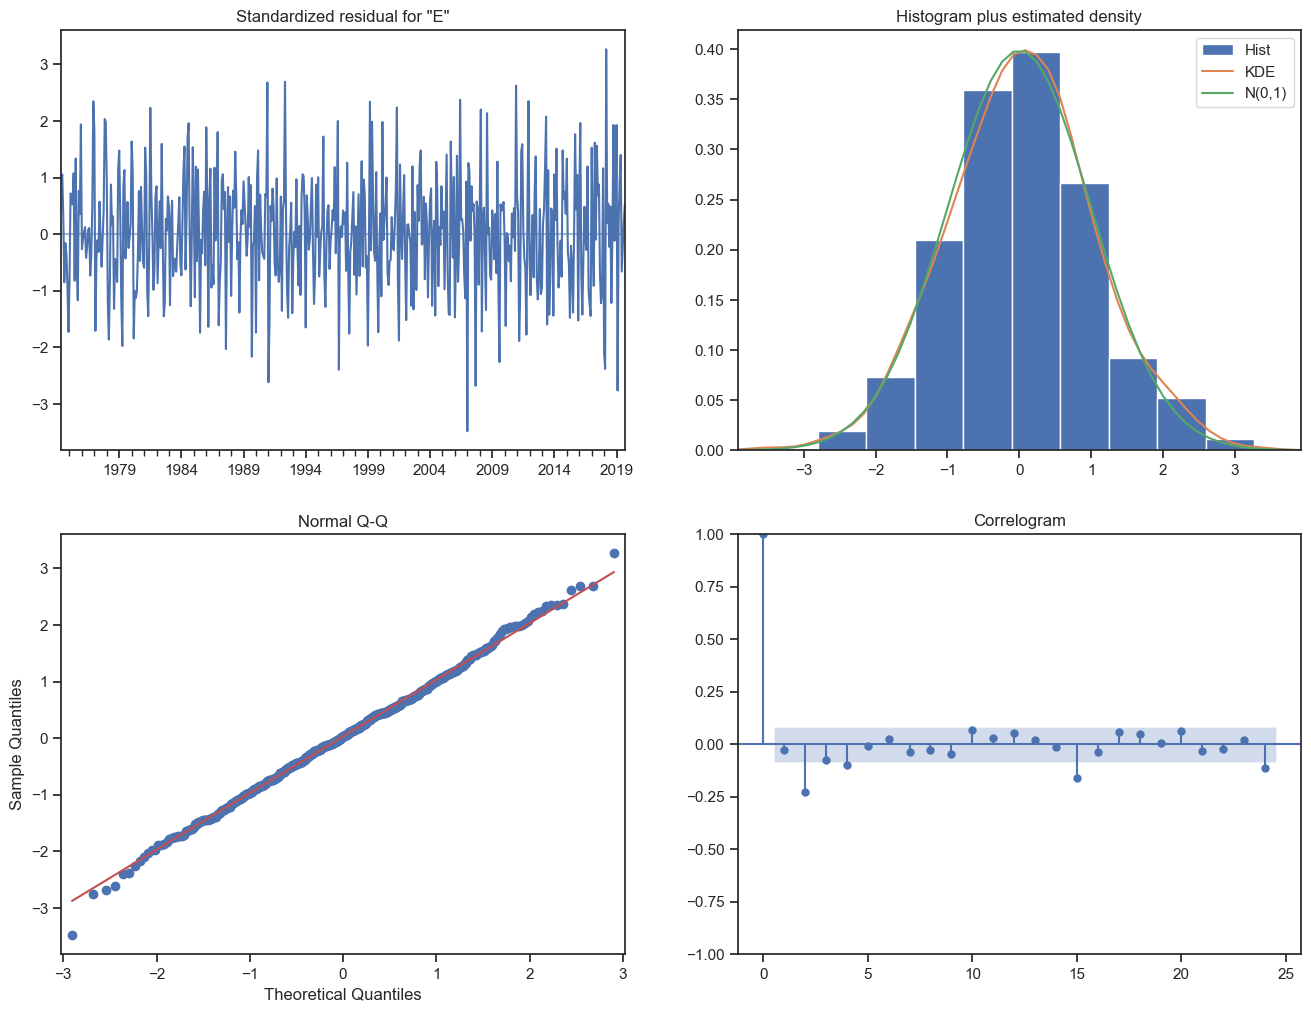

In [301]:
model.plot_diagnostics(lags=24, figsize=(16,12))
plt.show()



#Errors should follow normal distribution
#ACF of Errors - Error series should be white noise/random walk- There is no auto correlation among errors
